# Apprentissage supervisé - Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

 ## 1 Préparation des données

### 1.2 Information sur les données

In [2]:
mnist = fetch_openml("mnist_784",version=1)

In [3]:
#Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
#La taille des données (le nombre des features et la taille de chaque feature). Par convention,les données sont à stocker dans une variable "X"
X = mnist.data
print(X.shape)

(70000, 784)


In [6]:
#La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"
y = np.array(mnist.target)
print(y.shape)



(70000,)


In [7]:
#Les différentes classes de la base de données
np.array(mnist.target)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

• Une description détaillée de la base de données.

In [8]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

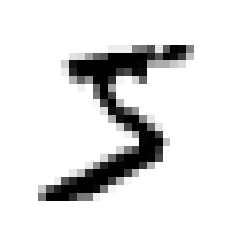

5

In [295]:
#Affichez l’image de la première instance de la base de données.

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

display(y[0])

In [10]:
y.dtype

dtype('O')

A travers la question précédente, vous avez dû remarquer que le type des labels est
une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique,
d’utiliser des chiffres. Par conséquent, appliquez le casting sur les labels pour les transformer
à des entiers.

In [11]:
y = y.astype(np.uint)
y.dtype

dtype('uint32')

### 1.3 Répartition des données

Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en
base d’apprentissage et en base de test. Les 60 000 premières images composeront la base
d’apprentissage et le reste des images constituera la base de test. Écrivez un code qui met en
exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de
test/d’apprentissage dans 4 variables.

In [12]:
X_test,X_train = X[60000:],X[:60000]
y_test,y_train = y[60000:],y[:60000]

print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(10000, 784) (60000, 784) (10000,) (60000,)


### Apprentissage d’un classifieur binaire

#### 1. 
En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables
(une première pour la base d’apprentissage et une autre pour la base de test) distinctes
True si la classe de l’instance est 5 et False Sinon. De ce fait, nous traitons une classification
binaire

In [81]:
y_bool_test = y_test == 5
display(y_bool_test)

y_bool_train = y_train == 5
display(y_bool_train)

array([False, False, False, ..., False,  True, False])

array([ True, False, False, ...,  True, False, False])

Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent
(SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [82]:
from sklearn.linear_model import SGDClassifier

In [205]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_bool_train)

SGDClassifier()

In [22]:
SGDClassifier(max_iter=5)

SGDClassifier(max_iter=5)

In [34]:
sgd_clf.predict([X_train[0]])

array([ True])

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

In [35]:
score = sgd_clf.score(X_train, y_bool_train)
score

0.09685

### 2.2.1 Taux de classification

#### 1.
Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation.

 Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher :

 le taux de classification (accuracy) de chaque fold

In [43]:
from sklearn.model_selection import cross_val_score
success = cross_val_score(sgd_clf, X_train, y_bool_train, cv=3, scoring='accuracy')

In [44]:
success

array([0.8778 , 0.85445, 0.86345])

le taux de classification (accuracy) de chaque fold

la moyenne des taux de classification:

In [48]:
moyenne_cross_val = success.mean()
moyenne_cross_val

0.8652333333333333

In [175]:
y_bool_train.shape

(60000,)

### 2.
Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de
MNIST comme "non-5". Créez une classe Never5Classifier qui hérite de la classe BaseEstimator.
la classe BaseEstimator existe dans le sous-module "base" du module "sklearn"

In [49]:
from sklearn.base import BaseEstimator

In [122]:
class Never5Classifier(BaseEstimator):
   
    def fit (self, X, y = None):
        
        pass
    
    def predict(self, X):
       
        structure = np.zeros((len(X),1), dtype=bool)
        return structure

In [125]:
instance = Never5Classifier()

In [126]:
success_classifieur  = cross_val_score(instance, X_train, y_bool_train, cv=3, scoring='accuracy')

In [117]:
success_classifieur

array([0.91125, 0.90855, 0.90915])

### 2.2.2 Matrice de confusion:

En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage.Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module "model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold cross validation.

In [90]:
from sklearn.model_selection import cross_val_predict

In [213]:
y_pred = cross_val_predict(sgd_clf, X_train , y_bool_train, cv=3)

In [214]:
y_pred

array([ True, False, False, ...,  True, False, False])

#### 2. Affichez la matrice de confusion du modèle d’apprentissage. Veillez à bien interpréter lamatrice de confusion

In [215]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

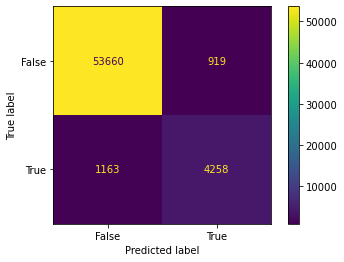

In [216]:
plot_confusion_matrix(sgd_clf, X_train, y_bool_train)

#### 2.2.3 Précision et rappel:

Calculez: 

la précision

In [217]:
y_pred = sgd_clf.predict(X_train)


In [218]:
print(y_pred)

[ True False False ...  True False False]


In [219]:
y_bool_train

array([ True, False, False, ...,  True, False, False])

In [220]:
from sklearn.metrics import precision_recall_fscore_support

In [221]:
precision, recall, f1, _ = precision_recall_fscore_support(y_bool_train, y_pred, average="weighted")

print("Précision :", precision, "\nRappel :", recall, "\nScore F1 :", f1)

Précision : 0.9646643710057398 
Rappel : 0.9653 
Score F1 : 0.9649392430921597


#### 2.2.3.2

Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction
de décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance
sinon il affecte la classe négative. Affichez les scores des différentes instances de la
base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_
function" pour l’argument "method" et une validation croisée de type 3-fold crossvalidation.

In [222]:
y_score = cross_val_predict(sgd_clf, X_train , y_bool_train, cv=3, method = "decision_function")


In [223]:
y_score

array([   912.28356055, -18850.6412725 , -35693.01260455, ...,
         3474.64430651, -15157.8529642 , -25834.89305021])

#### 3.
Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_
recall_curve"

In [224]:
from sklearn.metrics import precision_recall_curve

In [225]:
precision, recall, _ = precision_recall_curve(y_bool_train, y_score)
precision, recall 

(array([0.09038766, 0.09037249, 0.090374  , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]))

#### 4. 
Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe
des ordonnées doit contenir les précisions. Interprétez les résultats.

<function matplotlib.pyplot.show(close=None, block=None)>

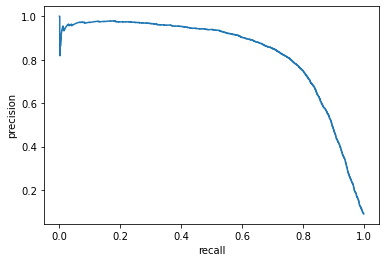

In [227]:
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show

##### 2.2.4 Courbe ROC:

#### 1. 
Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour
classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sousmodule
"metrics" du module "sklearn"

In [228]:
from sklearn.metrics import roc_curve

In [235]:
tfp,tvp,side = roc_curve(y_bool_train, y_score)
tft,tvp,side

(array([0.        , 0.        , 0.        , ..., 0.99954195, 0.99954195,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 1.10680686e-03, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  46114.29076166,   46113.29076166,   31687.12968586, ...,
        -111968.26131524, -113721.71215802, -157066.35757125]))

#### 2. 
Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe
des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et
activer le mode "grid" avec la fonction grid de matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

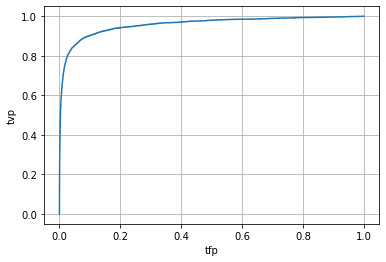

In [293]:
plt.plot(tfp,tvp)
plt.xlabel("tfp")
plt.ylabel("tvp")
plt.grid()
plt.show


#### 3.
Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez
la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn

In [231]:
from sklearn.metrics import roc_auc_score

In [233]:
auc = roc_auc_score(y_bool_train, y_score)
auc

0.958152632767385

### 3 Apprentissage d’un classifieur multi-classes

Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à
9) de la base de données MNIST.

#### 1.
En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes
les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les
classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie
II de TP.

In [247]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

#### 2.
Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de
données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

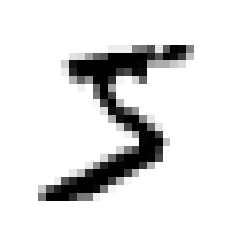

5

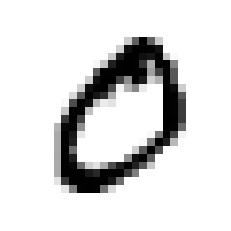

0

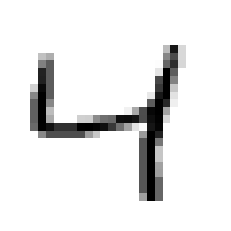

4

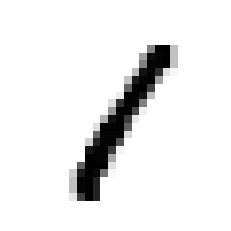

1

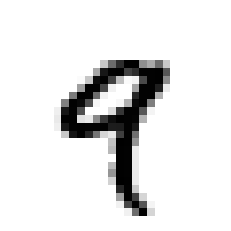

9

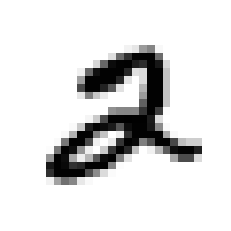

2

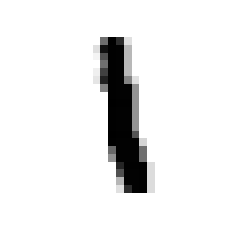

1

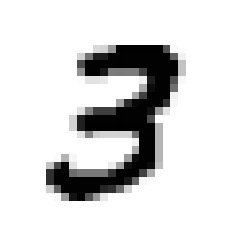

3

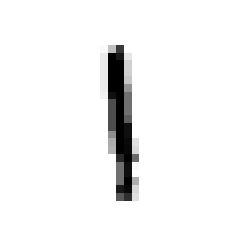

1

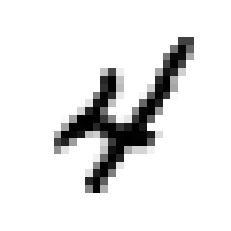

4

In [296]:
#Affichez l’image de la première instance de la base de données.
for i in range(10):
    some_digit = X[i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

    display(y[i])

In [306]:
sgd_clf.predict([X_train[9]])

array([4], dtype=uint32)

#### 3.
En utilisant l’objet qui instancie la classe SGDClassifier :

• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.

In [313]:
sgd_clf.decision_function(X_train)[0]

array([-18404.0303267 , -29314.62300232, -11057.95166463,    170.07696657,
       -19999.92016145,   2262.4996949 , -27757.31582795, -13530.84192104,
       -10076.07640168,  -7900.86096769])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est
ce que vous remarquez ?

In [309]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint32)

Je remarque que ces classes sont des int et plus des booléens 

#### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classification

1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold;
la moyenne des taux de classification

In [318]:
success_classifieur_dix_chiffres  = cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring='accuracy')

In [319]:
success_classifieur_dix_chiffres 

array([0.8613 , 0.87245, 0.86865])

2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci
en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [320]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de
type 3-fold cross-validation. Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [321]:
success_classifieur_dix_chiffres_standardise  = cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring='accuracy')

In [322]:
success_classifieur_dix_chiffres_standardise

array([0.89935, 0.8945 , 0.9049 ])

On constate le score est légèrement mieux que tout à l'heure 

#### 3.2.2 Matrice de Confusion

1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données
d’apprentissage.

In [323]:
sgd_clf.predict(X_train)

array([5, 0, 7, ..., 5, 6, 5], dtype=uint32)

2. Affichez la matrice de confusion du modèle d’apprentissage. Pour ce faire, utilisez la fonction
"confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice
de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10
classes. Interprétez les résultats.

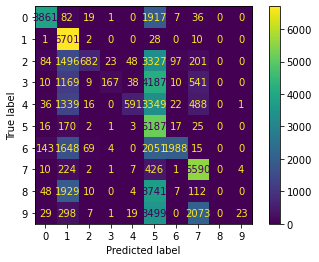

In [332]:
plot_confusion_matrix(sgd_clf, X_train, y_train)


In [ ]:
Le model reconnaît les chiffres assez facilement cependant il y a beaucoup de faux positifs
